In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy

In [ ]:
data= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
data.shape

(144867, 24)

In [ ]:
data.size

3476808

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
missing_source_name = data.loc[data["source_name"].isnull(), "source_center"].unique()
print(missing_source_name)

missing_destination_name = data.loc[data["destination_name"].isnull(), "destination_center"].unique()
print(missing_destination_name)


['IND342902A1B' 'IND577116AAA' 'IND282002AAD' 'IND465333A1B'
 'IND841301AAC' 'IND509103AAC' 'IND126116AAA' 'IND331022A1B'
 'IND505326AAB' 'IND852118A1B']
['IND342902A1B' 'IND577116AAA' 'IND282002AAD' 'IND465333A1B'
 'IND841301AAC' 'IND505326AAB' 'IND852118A1B' 'IND126116AAA'
 'IND509103AAC' 'IND221005A1A' 'IND250002AAC' 'IND331001A1C'
 'IND122015AAC']


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [ ]:
data["trip_creation_time"].min(), data["od_end_time"].max()

('2018-09-12 00:00:16.535741', '2018-10-08 03:00:24.353479')

In [ ]:
#Removing null values as most of it is training data

data= data.dropna()

In [ ]:
# Converting some columns from object datatype to required datatype

data["od_start_time"]= pd.to_datetime(data["od_start_time"])
data["od_end_time"]= pd.to_datetime(data["od_end_time"])
data["data"]= data["data"].astype("category")
data["route_type"]= data["route_type"].astype("category")

<ipython-input-141-f71bd55fa438>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["od_start_time"]= pd.to_datetime(data["od_start_time"])
<ipython-input-141-f71bd55fa438>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["od_end_time"]= pd.to_datetime(data["od_end_time"])
<ipython-input-141-f71bd55fa438>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
# Removing unknown fields

unknown_fields = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"]
data = data.drop(columns = unknown_fields)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [ ]:
data["segment_key"]= data["trip_uuid"]+"_"+data["source_center"]+"_"+data["destination_center"]

data["segment_actual_time_sum"]= data.groupby("segment_key")["segment_actual_time"].cumsum()
data["segment_osrm_distance_sum"]= data.groupby("segment_key")["segment_osrm_distance"].cumsum()
data["segment_osrm_time_sum"]= data.groupby("segment_key")["segment_osrm_time"].cumsum()

data[["segment_key", "segment_actual_time_sum", "segment_osrm_distance_sum", "segment_osrm_time_sum"]]

,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
...,...,...,...,...
144862,trip-153746066843555182_IND131028AAB_IND000000ACB,92.0,65.3487,94.0
144863,trip-153746066843555182_IND131028AAB_IND000000ACB,118.0,82.7212,115.0
144864,trip-153746066843555182_IND131028AAB_IND000000ACB,138.0,103.4265,149.0
144865,trip-153746066843555182_IND131028AAB_IND000000ACB,155.0,122.3150,176.0


In [ ]:
# Merging rows

create_segment_dict={ "data" : "first",
                      "route_type" : "first",
                      "trip_creation_time" : "first",
                      "trip_uuid" : "first",
                      "source_center" : "first",
                      "source_name" : "first",
                      "destination_center" : "first",
                      "destination_name" : "last",
                      "od_start_time" : "first",
                      "od_end_time" : "first",
                      "start_scan_to_end_scan" : "first",
                      "actual_distance_to_destination" : "last",
                      "actual_time" : "last",
                      "osrm_time" : "last",
                      "osrm_distance" : "last",
                      "segment_actual_time" : "sum",
                      "segment_osrm_time" : "sum",
                      "segment_osrm_distance" : "sum"}

segmented_data = data.groupby(by= "segment_key", as_index = False).agg(create_segment_dict)
segmented_data = segmented_data.sort_values(by=["segment_key","od_end_time"], ascending=True)
segmented_data.head()

,segment_key,data,route_type,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


In [ ]:
# FeatureEngineering
# Calculate time taken between od_start_time and od_end_time

segmented_data["od_time_diff_hour"]= round(((segmented_data["od_end_time"] - segmented_data["od_start_time"]).dt.total_seconds()/3600),2)
segmented_data.head()

,segment_key,data,route_type,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,21.01
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,16.66
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,0.98
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,2.05
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,13.91


In [ ]:
# Splitting and extracting features out of destination

segmented_data[["Destination_city", "Destination_place_code_state"]] = segmented_data["destination_name"].str.split("_", 1, expand=True)
segmented_data[["Destination_place", "Destination_code_state"]] = segmented_data["Destination_place_code_state"].str.rstrip(")").str.split("_", 1, expand=True)
segmented_data[["Destination_code", "Destination_state"]]= segmented_data["Destination_code_state"].str.split(" ", 1, expand= True)
segmented_data["Destination_state"]= segmented_data["Destination_state"].str[1:]
segmented_data.drop(["Destination_place_code_state", "Destination_code_state"], axis=1, inplace=True)


<ipython-input-147-fcffba9b37fc>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  segmented_data[['Destination_city', 'Destination_place_code_state']] = segmented_data['destination_name'].str.split('_', 1, expand=True)
<ipython-input-147-fcffba9b37fc>:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  segmented_data[['Destination_place', 'Destination_code_state']] = segmented_data['Destination_place_code_state'].str.rstrip(')').str.split('_', 1, expand=True)
<ipython-input-147-fcffba9b37fc>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  segmented_data[["Destination_code", "Destination_state"]]= segmented_data["Destination_code_state"].str.split(" ", 1, expand= True)


In [ ]:
# Splitting and extracting features out of Source

segmented_data[["Source_city", "Source_place_code_state"]] = segmented_data["source_name"].str.split("_", 1, expand=True)
segmented_data[["Source_place", "Source_code_state"]] = segmented_data["Source_place_code_state"].str.rstrip(")").str.split("_", 1, expand=True)
segmented_data[["Source_code", "Source_state"]]= segmented_data["Source_code_state"].str.split(" ", 1, expand= True)
segmented_data["Source_state"]= segmented_data["Source_state"].str[1:]
segmented_data.drop(["Source_place_code_state", "Source_code_state"], axis=1, inplace=True)
segmented_data.head()

<ipython-input-148-64f434af2676>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  segmented_data[['Source_city', 'Source_place_code_state']] = segmented_data['source_name'].str.split('_', 1, expand=True)
<ipython-input-148-64f434af2676>:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  segmented_data[['Source_place', 'Source_code_state']] = segmented_data['Source_place_code_state'].str.rstrip(')').str.split('_', 1, expand=True)
<ipython-input-148-64f434af2676>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  segmented_data[["Source_code", "Source_state"]]= segmented_data["Source_code_state"].str.split(" ", 1, expand= True)


,segment_key,data,route_type,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,od_time_diff_hour,Destination_city,Destination_place,Destination_code,Destination_state,Source_city,Source_place,Source_code,Source_state
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,670.6205,21.01,Gurgaon,Bilaspur,HB,Haryana,Kanpur,Central,H_6,Uttar Pradesh
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,649.8528,16.66,Kanpur,Central,H_6,Uttar Pradesh,Bhopal,Trnsport,H,Madhya Pradesh
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,28.1995,0.98,Chikblapur,ShntiSgr,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,55.9899,2.05,Doddablpur,ChikaDPP,D,Karnataka,Tumkur,Veersagr,I,Karnataka
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,...,317.7408,13.91,Chandigarh,Mehmdpur,H,Punjab,Gurgaon,Bilaspur,HB,Haryana


In [ ]:
segmented_data.head()

,segment_key,data,route_type,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,od_time_diff_hour,Destination_city,Destination_place,Destination_code,Destination_state,Source_city,Source_place,Source_code,Source_state
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,670.6205,21.01,Gurgaon,Bilaspur,HB,Haryana,Kanpur,Central,H_6,Uttar Pradesh
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,649.8528,16.66,Kanpur,Central,H_6,Uttar Pradesh,Bhopal,Trnsport,H,Madhya Pradesh
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,28.1995,0.98,Chikblapur,ShntiSgr,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,55.9899,2.05,Doddablpur,ChikaDPP,D,Karnataka,Tumkur,Veersagr,I,Karnataka
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,...,317.7408,13.91,Chandigarh,Mehmdpur,H,Punjab,Gurgaon,Bilaspur,HB,Haryana


In [ ]:
#  Extracting features like month, year, day from trip_creation_time

segmented_data["trip_creation_day"] = pd.to_datetime(segmented_data["trip_creation_time"]).dt.day
segmented_data["trip_creation_month"] = pd.to_datetime(segmented_data["trip_creation_time"]).dt.month
segmented_data["trip_creation_year"] = pd.to_datetime(segmented_data["trip_creation_time"]).dt.year

In [ ]:
segmented_data.head()

,segment_key,data,route_type,trip_creation_time,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,Destination_place,Destination_code,Destination_state,Source_city,Source_place,Source_code,Source_state,trip_creation_day,trip_creation_month,trip_creation_year
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,Bilaspur,HB,Haryana,Kanpur,Central,H_6,Uttar Pradesh,12,9,2018
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,Central,H_6,Uttar Pradesh,Bhopal,Trnsport,H,Madhya Pradesh,12,9,2018
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,ShntiSgr,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,12,9,2018
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,ChikaDPP,D,Karnataka,Tumkur,Veersagr,I,Karnataka,12,9,2018
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,...,Mehmdpur,H,Punjab,Gurgaon,Bilaspur,HB,Haryana,12,9,2018


In [ ]:
segmented_data.describe(include= "object").T

,count,unique,top,freq
segment_key,26222,26222,trip-153671041653548748_IND209304AAA_IND000000ACB,1
trip_creation_time,26222,14787,2018-09-17 08:30:59.260046,8
trip_uuid,26222,14787,trip-153717306559016761,8
source_center,26222,1496,IND000000ACB,1052
source_name,26222,1496,Gurgaon_Bilaspur_HB (Haryana),1052
destination_center,26222,1466,IND000000ACB,928
destination_name,26222,1466,Gurgaon_Bilaspur_HB (Haryana),928
Destination_city,26222,1256,Bengaluru,1180
Destination_place,25238,1154,Central,1860
Destination_code,23208,48,D,9156


In [ ]:
create_trip_dic= {"data" : "first",
                  "route_type" : "first",
                  "trip_creation_time" : "first",
                  "trip_creation_day" : "first",
                  "trip_creation_month" : "first",
                  "trip_creation_year" : "first",
                  "source_center" : "first",
                  "source_name" : "first",
                  "Source_state" : "first",
                  "Source_city" : "first",
                  "Source_place" : "first",
                  "Source_code" : "first",
                  "destination_center" : "last",
                  "destination_name" : 'last',
                  "Destination_state" : "last",
                  "Destination_city" : "last",
                  "Destination_place" : "last",
                  "Destination_code" : "last",
                  "od_start_time" : "first",
                  "od_end_time" : "first",
                  "start_scan_to_end_scan" : "first",
                  "actual_distance_to_destination" : "last",
                  "actual_time" : "last",
                  "osrm_time" : "last",
                  "osrm_distance" : "last",
                  "segment_actual_time" : "sum",
                  "segment_osrm_time" : "sum",
                  "segment_osrm_distance" : "sum"
                  }
trip_data= segmented_data.groupby("trip_uuid", as_index= False).agg(create_trip_dic)
trip_data.head()

,trip_uuid,data,route_type,trip_creation_time,trip_creation_day,trip_creation_month,trip_creation_year,source_center,source_name,Source_state,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,12,9,2018,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Uttar Pradesh,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,440.973689,830.0,388.0,544.8027,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,12,9,2018,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Karnataka,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,48.542890,96.0,42.0,56.9116,141.0,65.0,84.1894
2,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,12,9,2018,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,1689.964663,2736.0,1528.0,2072.8556,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,12,9,2018,IND400072AAB,Mumbai Hub (Maharashtra),None,...,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,12,9,2018,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,...,2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,26.600536,63.0,27.0,29.5696,340.0,115.0,146.7919


In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   route_type                      14787 non-null  category      
 3   trip_creation_time              14787 non-null  object        
 4   trip_creation_day               14787 non-null  int64         
 5   trip_creation_month             14787 non-null  int64         
 6   trip_creation_year              14787 non-null  int64         
 7   source_center                   14787 non-null  object        
 8   source_name                     14787 non-null  object        
 9   Source_state                    13564 non-null  object        
 10  Source_city                     14787 non-null  object        
 11  So

In [ ]:
trip_data.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_creation_day,14787.0,18.375127,7.882198,1.000000,14.000000,19.000000,25.000000,30.000000
trip_creation_month,14787.0,9.120105,0.325096,9.000000,9.000000,9.000000,9.000000,10.000000
trip_creation_year,14787.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
start_scan_to_end_scan,14787.0,339.769730,505.407155,22.000000,104.000000,174.000000,334.000000,7898.000000
actual_distance_to_destination,14787.0,104.005219,242.069053,9.002461,20.086307,32.852495,65.057323,1927.447705
actual_time,14787.0,227.443836,443.875166,9.000000,51.000000,86.000000,182.000000,4532.000000
osrm_time,14787.0,101.437817,213.971631,6.000000,23.000000,38.000000,73.000000,1686.000000
osrm_distance,14787.0,129.210983,293.953554,9.072900,26.018550,41.108100,86.025100,2326.199100
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000


In [ ]:
data_type= trip_data.groupby("data")["trip_uuid"].count().reset_index()
data_type

,data,trip_uuid
0,test,4142
1,training,10645


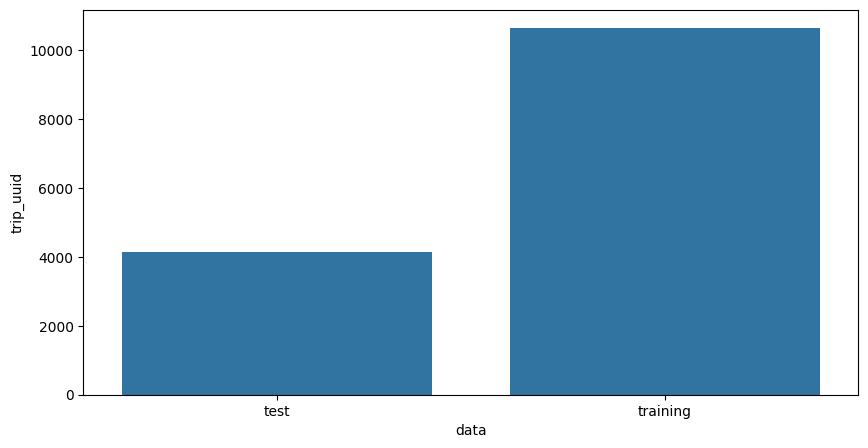

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data= data_type, x="data", y="trip_uuid")
plt.show()

In [ ]:
data_route= trip_data.groupby("route_type")["trip_uuid"].count().reset_index()
data_route

,route_type,trip_uuid
0,Carting,8906
1,FTL,5881


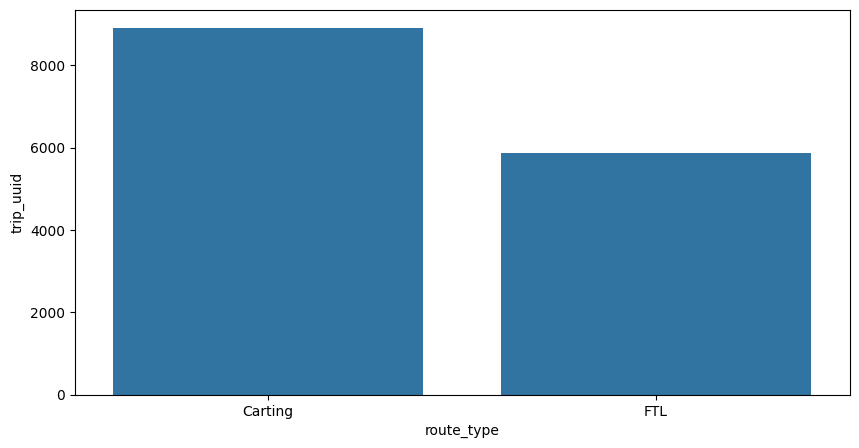

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(data= data_route, x="route_type", y="trip_uuid")
plt.show()

In [ ]:
data_day= trip_data.groupby("trip_creation_day")["trip_uuid"].count().reset_index()
data_day= data_day.sort_values(by= "trip_uuid", ascending= False)
data_day

,trip_creation_day,trip_uuid
9,18,791
6,15,783
4,13,750
3,12,747
13,22,740
12,21,740
8,17,722
5,14,712
11,20,703
16,25,695


[]

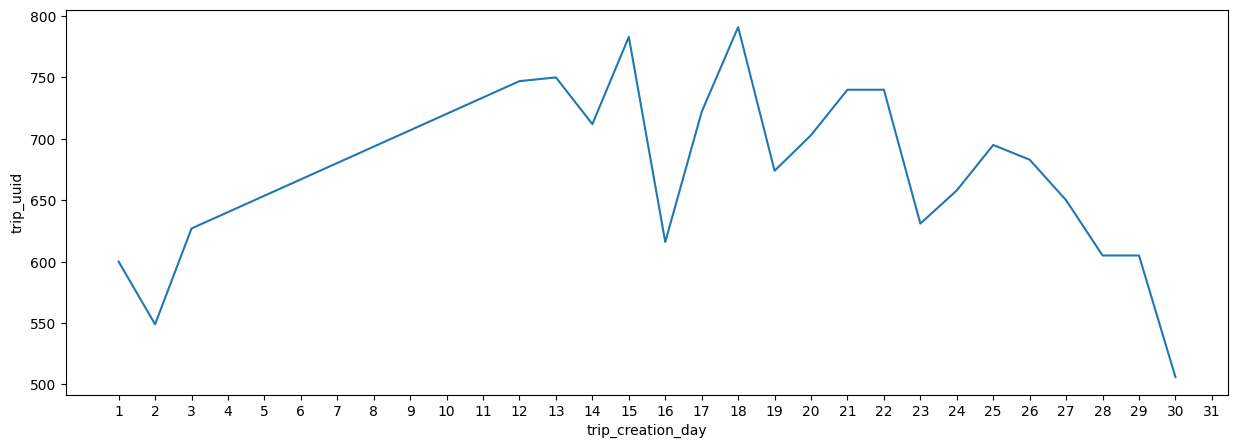

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(data = data_day,
             x = data_day['trip_creation_day'],
             y = data_day['trip_uuid'])
plt.xticks(np.arange(1, 32))
plt.plot()

In [ ]:
data_month= trip_data.groupby("trip_creation_month")["trip_uuid"].count().reset_index()
data_month= data_month.sort_values(by= "trip_uuid", ascending= False)
data_month

,trip_creation_month,trip_uuid
0,9,13011
1,10,1776


[]

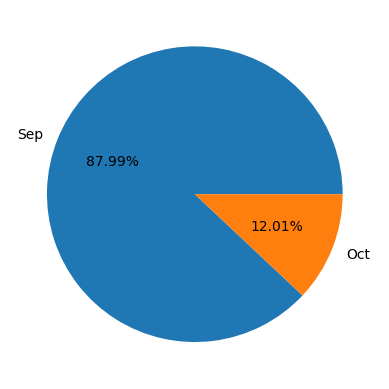

In [ ]:
plt.pie(x= data_month["trip_uuid"], labels= ["Sep", "Oct"], autopct= "%.2f%%")
plt.plot()

In [ ]:
data_source_state = trip_data.groupby(by = 'Source_state')['trip_uuid'].count().reset_index()
data_source_state = data_source_state.sort_values(by = 'trip_uuid', ascending = False)
data_source_state.head()

,Source_state,trip_uuid
17,Maharashtra,2264
14,Karnataka,2113
10,Haryana,1730
25,Tamil Nadu,902
26,Telangana,783


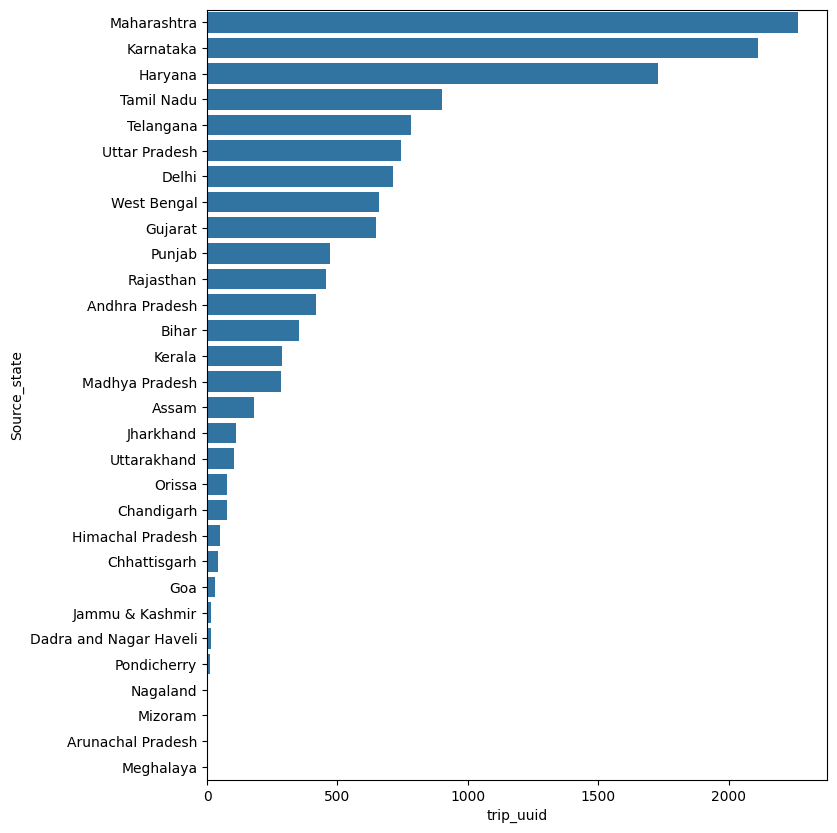

In [ ]:
plt.figure(figsize = (8, 10))
sns.barplot(data = data_source_state,
            x = data_source_state['trip_uuid'],
            y = data_source_state['Source_state'])
plt.show()

In [ ]:
data_source_city = trip_data.groupby(by = "Source_city")["trip_uuid"].count().reset_index()
data_source_city = data_source_city.sort_values(by= "trip_uuid", ascending = False)[:30]
data_source_city.head()

,Source_city,trip_uuid
256,Gurgaon,1128
84,Bengaluru,1052
105,Bhiwandi,697
466,Mumbai,654
62,Bangalore,648


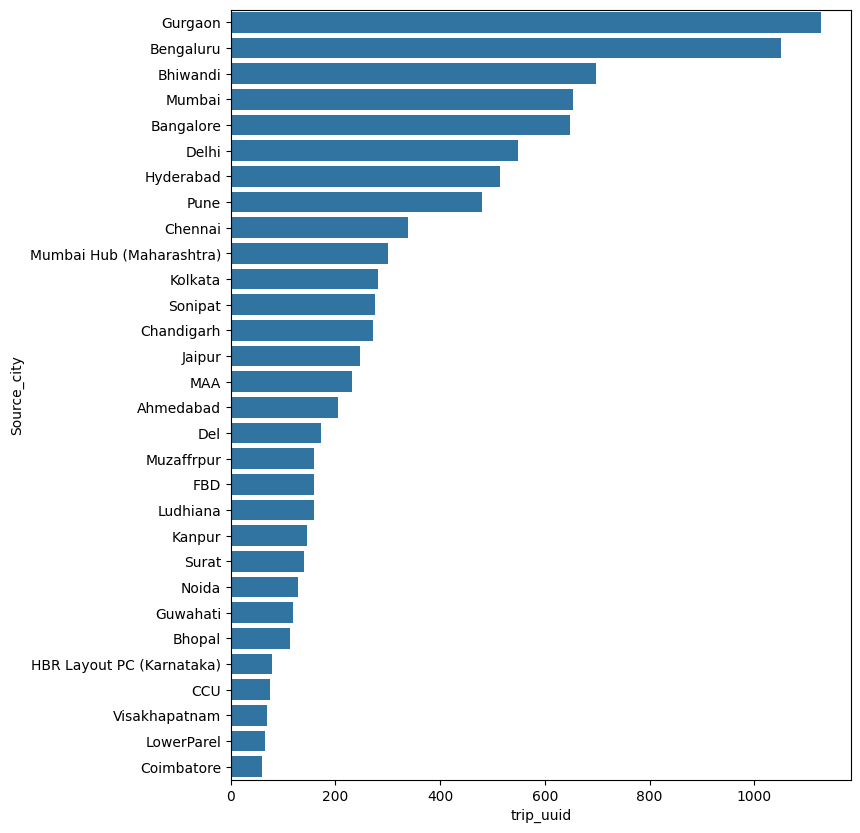

In [ ]:
plt.figure(figsize = (8, 10))
sns.barplot(data = data_source_city,
            x = data_source_city["trip_uuid"],
            y = data_source_city['Source_city'])
plt.show()

In [ ]:
data_destination_state = trip_data.groupby("Destination_state")["trip_uuid"].count().reset_index()
data_destination_state = data_destination_state.sort_values(by= "trip_uuid", ascending = False)
data_destination_state.head()

,Destination_state,trip_uuid
14,Karnataka,2175
17,Maharashtra,2154
10,Haryana,1524
24,Tamil Nadu,1014
25,Telangana,797


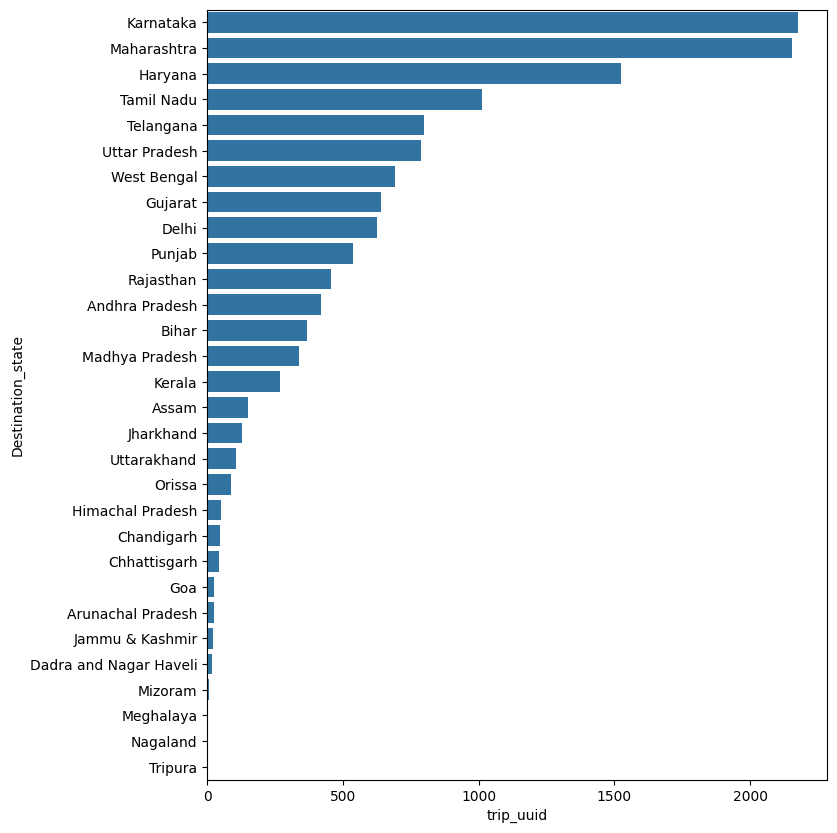

In [ ]:
plt.figure(figsize = (8, 10))
sns.barplot(data = data_destination_state,
            x = data_destination_state["trip_uuid"],
            y = data_destination_state["Destination_state"])
plt.show()

In [ ]:
data_destination_city = trip_data.groupby("Destination_city")["trip_uuid"].count().reset_index()
data_destination_city = data_destination_city.sort_values(by= "trip_uuid", ascending = False)
data_destination_city.head()

,Destination_city,trip_uuid
103,Bengaluru,1088
548,Mumbai,966
301,Gurgaon,877
214,Delhi,554
79,Bangalore,551


In [ ]:
num_cols = ["start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time", "osrm_distance", "segment_actual_time", "segment_osrm_time", "segment_osrm_distance"]
data_corr= trip_data[num_cols].corr()

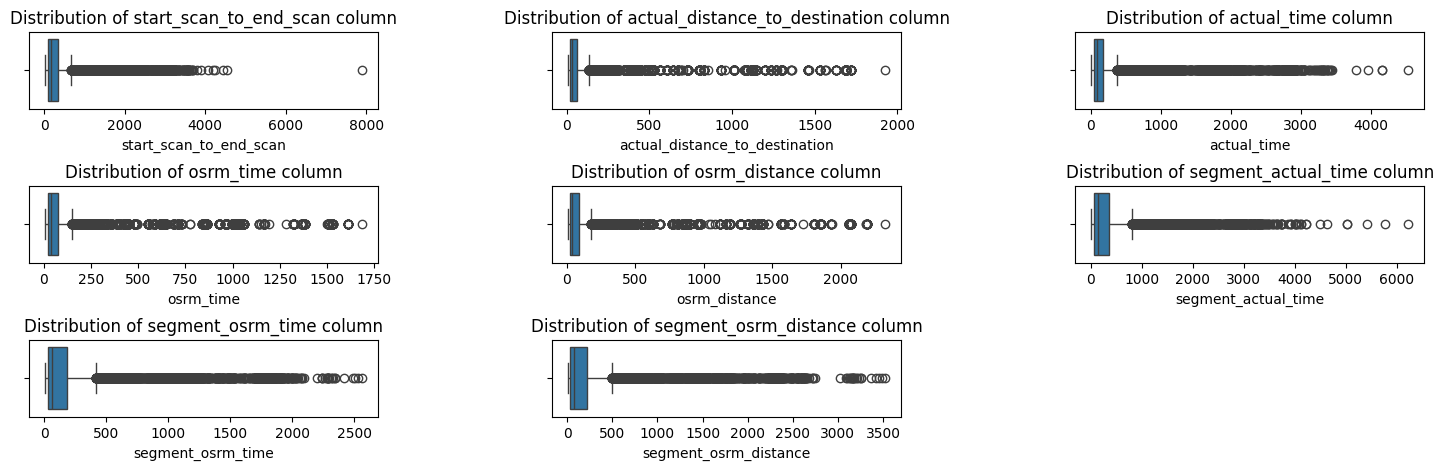

In [ ]:
plt.figure(figsize= (18,5))
for i in range(len(num_cols)):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x= trip_data[num_cols[i]])
  plt.title(f"Distribution of {num_cols[i]} column")

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

[]

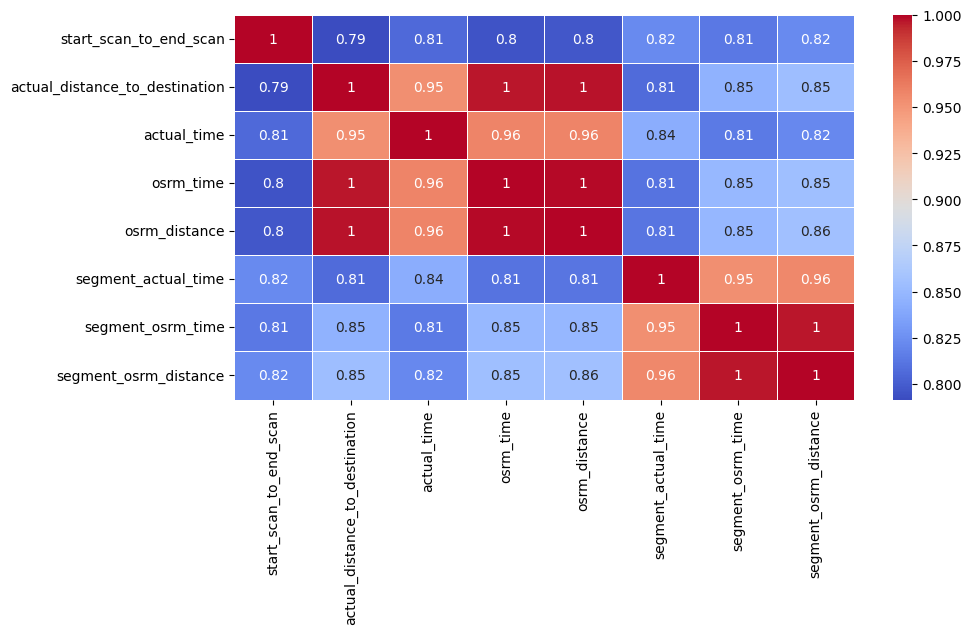

In [ ]:
plt.figure(figsize= (10, 5))
sns.heatmap(data= data_corr, annot = True, cmap='coolwarm', linewidths=0.5)
plt.plot()

In [ ]:
# hot encoding on categorical features

trip_data["route_type"]= trip_data["route_type"].map({"FTL": 0, "Carting": 1})
trip_data.head()

,trip_uuid,data,route_type,trip_creation_time,trip_creation_day,trip_creation_month,trip_creation_year,source_center,source_name,Source_state,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,0,2018-09-12 00:00:16.535741,12,9,2018,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Uttar Pradesh,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,440.973689,830.0,388.0,544.8027,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,1,2018-09-12 00:00:22.886430,12,9,2018,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Karnataka,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,48.542890,96.0,42.0,56.9116,141.0,65.0,84.1894
2,trip-153671043369099517,training,0,2018-09-12 00:00:33.691250,12,9,2018,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,1689.964663,2736.0,1528.0,2072.8556,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,1,2018-09-12 00:01:00.113710,12,9,2018,IND400072AAB,Mumbai Hub (Maharashtra),None,...,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,0,2018-09-12 00:02:09.740725,12,9,2018,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,...,2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,26.600536,63.0,27.0,29.5696,340.0,115.0,146.7919


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(trip_data[num_cols])

StandardScaler()

In [ ]:
trip_data[num_cols] = scaler.transform(trip_data[num_cols])
trip_data[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,1.820832,1.392082,1.357536,1.339298,1.413848,2.147833,2.629714,2.633597
1,-0.557529,-0.229126,-0.296138,-0.277793,-0.245963,-0.381163,-0.367090,-0.332307
2,0.977918,6.551904,5.651681,6.667288,6.612304,5.311326,5.594737,5.571936
3,-0.474425,-0.358711,-0.379498,-0.403982,-0.372626,-0.528553,-0.522809,-0.486596
4,-0.371534,-0.319774,-0.370486,-0.347898,-0.338981,-0.023473,-0.208192,-0.182120
...,...,...,...,...,...,...,...,...
14782,-0.371534,-0.300518,-0.402027,-0.315182,-0.287970,-0.487212,-0.376623,-0.378690
14783,-0.553572,-0.365575,-0.465110,-0.418003,-0.384845,-0.596856,-0.538699,-0.495684
14784,-0.181582,-0.349786,-0.305150,-0.361919,-0.341432,-0.129522,-0.293997,-0.282653
14785,-0.464532,-0.377357,-0.444833,-0.408656,-0.385082,-0.170863,0.128670,0.001984


In [ ]:
# Hypothesis Testing:
# 1. actual_time aggregated value and OSRM time aggregated value

trip_data[["actual_time", "osrm_time"]].describe()

,actual_time,osrm_time
count,1.478700e+04,1.478700e+04
mean,3.003241e-17,-2.594800e-17
std,1.000034e+00,1.000034e+00
min,-4.921456e-01,-4.460453e-01
25%,-3.975212e-01,-3.665928e-01
50%,-3.186676e-01,-2.964877e-01
75%,-1.023832e-01,-1.329091e-01
max,9.698001e+00,7.405728e+00


[]

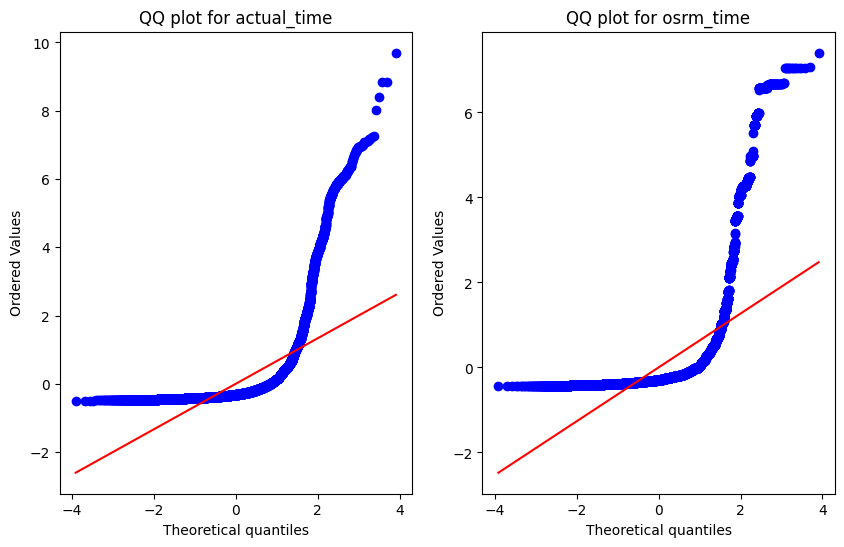

In [ ]:
# Distribution check using QQ plot

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
spy.probplot(trip_data['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(trip_data['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

In [ ]:
# Homogeneity of Variances using Lavene's test

# H0- Variance are significantly different
# HA- Variance are not significantly different

test_stat, p_value = spy.levene(trip_data["actual_time"], trip_data["osrm_time"])
print('p-value', p_value)
if p_value < 0.05:
    print("Variance are significantly different")
else:
    print("Variance are not significantly different")

p-value 0.004369154964102629
Variance are significantly different


In [ ]:
# Since the samples do not follow any of the assumptions T-Test cannot be applied here.
# we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

t_stat, p_value = spy.mannwhitneyu(trip_data["actual_time"], trip_data["osrm_time"])
print("p-value", p_value)
if p_value < 0.05:
    print("The samples are not similar")
else:
    print("The samples are similar")

p-value 9.509176874996746e-61
The samples are not similar


In [ ]:
# 2. actual_time aggregated value and segment actual time aggregated value.

trip_data[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,1.478700e+04,1.478700e+04
mean,3.003241e-17,-2.979215e-17
std,1.000034e+00,1.000034e+00
min,-4.921456e-01,-6.184254e-01
25%,-3.975212e-01,-5.159714e-01
50%,-3.186676e-01,-3.703788e-01
75%,-1.023832e-01,1.966547e-02
max,9.698001e+00,1.056344e+01


[]

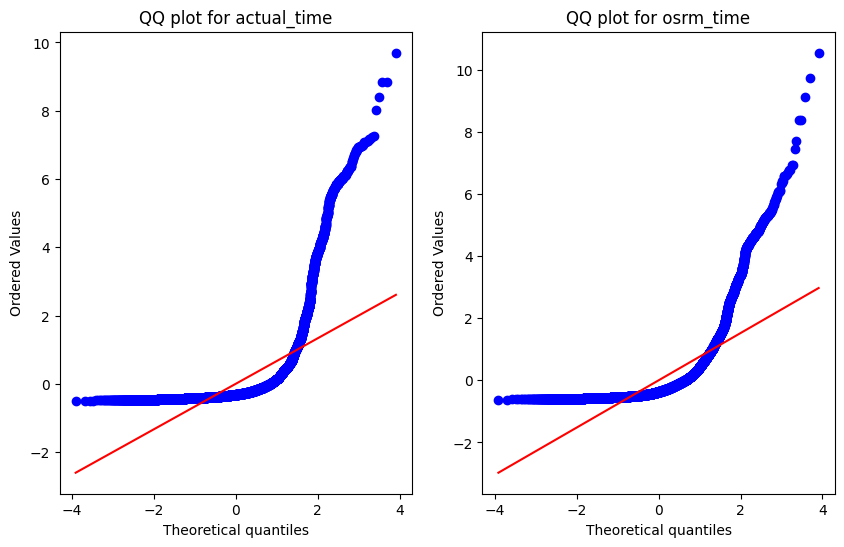

In [ ]:
# Distribution check using QQ plot

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
spy.probplot(trip_data["actual_time"], plot = plt, dist = "norm")
plt.title("QQ plot for actual_time")
plt.subplot(1, 2, 2)
spy.probplot(trip_data["segment_actual_time"], plot = plt, dist = "norm")
plt.title("QQ plot for osrm_time")
plt.plot()

In [ ]:
# Homogeneity of Variances using Lavene's test

# H0- Variance are significantly different
# HA- Variance are not significantly different

test_stat, p_value = spy.levene(trip_data["actual_time"], trip_data["segment_actual_time"])
print("p-value", p_value)
if p_value < 0.05:
    print("Variance are significantly different")
else:
    print("Variance are not significantly different")

p-value 2.1119134589517006e-23
Variance are significantly different


In [ ]:
# Since the samples do not follow any of the assumptions T-Test cannot be applied here.
# we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

t_stat, p_value = spy.mannwhitneyu(trip_data["actual_time"], trip_data["segment_actual_time"])
print("p-value", p_value)
if p_value < 0.05:
    print("The samples are not similar")
else:
    print("The samples are similar")

p-value 2.3269870249576406e-184
The samples are not similar


In [ ]:
# 3.OSRM distance aggregated value and segment OSRM distance aggregated value.

trip_data[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,1.478700e+04,1.478700e+04
mean,4.180511e-17,-7.399985e-17
std,1.000034e+00,1.000034e+00
min,-4.087113e-01,-5.125146e-01
25%,-3.510620e-01,-4.561227e-01
50%,-2.997272e-01,-3.668653e-01
75%,-1.469189e-01,-1.474182e-02
max,7.474182e+00,7.919079e+00


[]

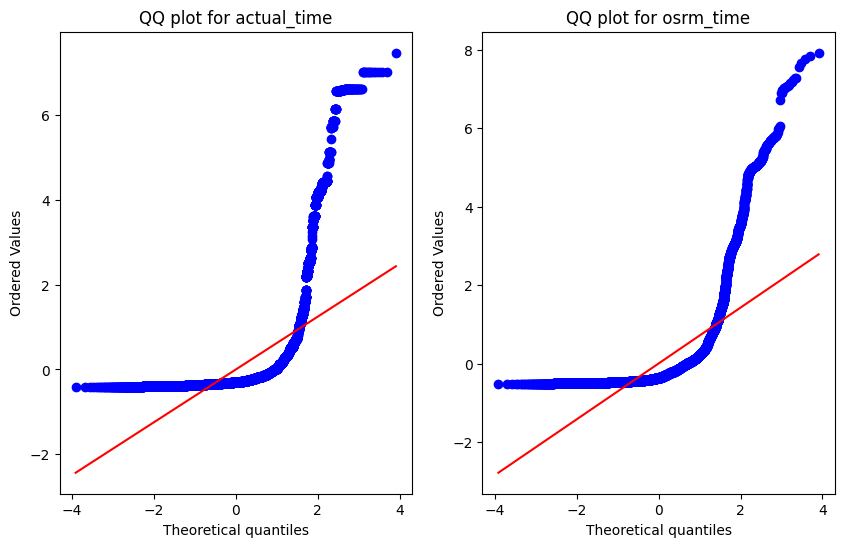

In [ ]:
# Distribution check using QQ plot

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
spy.probplot(trip_data["osrm_distance"], plot = plt, dist = "norm")
plt.title("QQ plot for actual_time")
plt.subplot(1, 2, 2)
spy.probplot(trip_data["segment_osrm_distance"], plot = plt, dist = "norm")
plt.title("QQ plot for osrm_time")
plt.plot()

In [ ]:
# Homogeneity of Variances using Lavene's test

# H0- Variance are significantly different
# HA- Variance are not significantly different

test_stat, p_value = spy.levene(trip_data["osrm_distance"], trip_data["segment_osrm_distance"])
print("p-value", p_value)
if p_value < 0.05:
    print("Variance are significantly different")
else:
    print("Variance are not significantly different")

p-value 1.5684805255129562e-18
Variance are significantly different


In [ ]:
# Since the samples do not follow any of the assumptions T-Test cannot be applied here.
# we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

t_stat, p_value = spy.mannwhitneyu(trip_data["osrm_distance"], trip_data["segment_osrm_distance"])
print("p-value", p_value)
if p_value < 0.05:
    print("The samples are not similar")
else:
    print("The samples are similar")

p-value 6.077882880733487e-272
The samples are not similar


In [ ]:
# 4. OSRM time aggregated value and segment OSRM time aggregated value.

trip_data[["osrm_time", "segment_osrm_time"]].describe()

,osrm_time,segment_osrm_time
count,1.478700e+04,1.478700e+04
mean,-2.594800e-17,-5.093496e-17
std,1.000034e+00,1.000034e+00
min,-4.460453e-01,-5.545885e-01
25%,-3.665928e-01,-4.783178e-01
50%,-2.964877e-01,-3.670896e-01
75%,-1.329091e-01,1.108595e-02
max,7.405728e+00,7.574598e+00


[]

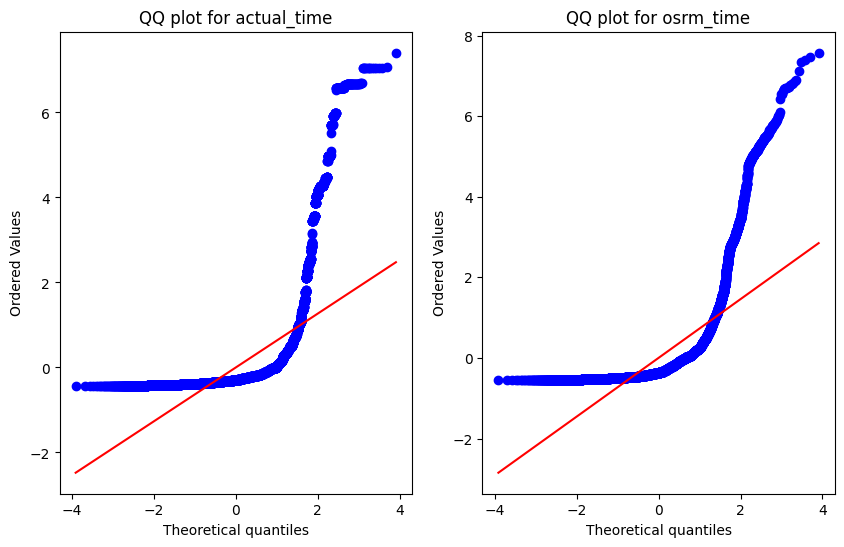

In [ ]:
# Distribution check using QQ plot

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
spy.probplot(trip_data["osrm_time"], plot = plt, dist = "norm")
plt.title("QQ plot for actual_time")
plt.subplot(1, 2, 2)
spy.probplot(trip_data["segment_osrm_time"], plot = plt, dist = "norm")
plt.title("QQ plot for osrm_time")
plt.plot()

In [ ]:
# Homogeneity of Variances using Lavene's test

# H0- Variance are significantly different
# HA- Variance are not significantly different

test_stat, p_value = spy.levene(trip_data["osrm_time"], trip_data["segment_osrm_time"])
print("p-value", p_value)
if p_value < 0.05:
    print("Variance are significantly different")
else:
    print("Variance are not significantly different")

p-value 3.372487757874399e-21
Variance are significantly different


In [ ]:
# Since the samples do not follow any of the assumptions T-Test cannot be applied here.
# we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

t_stat, p_value = spy.mannwhitneyu(trip_data["osrm_time"], trip_data["segment_osrm_time"])
print("p-value", p_value)
if p_value < 0.05:
    print("The samples are not similar")
else:
    print("The samples are similar")

p-value 1.6475103625829434e-233
The samples are not similar
